In [1]:
import pandas as pd

import nltk
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

In [2]:
yelp=pd.read_csv('yelp.csv')

In [4]:
yelp.shape

(10000, 10)

In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
yelp['text length']= yelp['text'].apply(len)

In [9]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


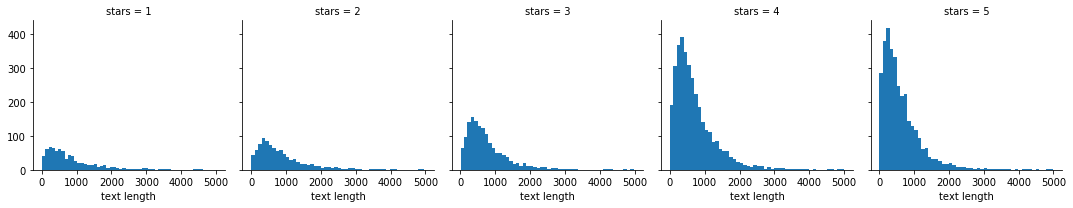

In [10]:
g = sns.FacetGrid(data=yelp, col='stars')
g.map(plt.hist, 'text length', bins=50)

In [3]:
yelp_class= yelp[(yelp['stars']==1)| (yelp['stars']==5)]
yelp_class.shape

(4086, 10)

In [4]:

Y= yelp_class['stars']
yelp_class['text']= [entry.lower() for entry in yelp_class['text']]
yelp_class['text']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0       my wife took me here on my birthday for breakf...
1       i have no idea why some people give bad review...
3       rosie, dakota, and i love chaparral dog park!!...
4       general manager scott petello is a good egg!!!...
6       drop what you're doing and drive here. after i...
9       nobuo shows his unique talents with everything...
10      the oldish man who owns the store is as sweet ...
11      wonderful vietnamese sandwich shoppe. their ba...
12      they have a limited time thing going on right ...
17      okay this is the best place ever! i grew up sh...
21      this place shouldn't even be reviewed - becaus...
22      first time my friend and i went there... it wa...
23      u can go there n check the car out. if u wanna...
24      i love this place! i have been coming here for...
26      i love love love this place. my boss (who is i...
30      disclaimer: like many of you, i am a sucker fo...
31      disgusting!  had a groupon so my daughter and ...
32      never 

In [ ]:
import string
def text_process(text):
    nopunc= [char for char in text if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

text_process(yelp_class['text'])


In [5]:
import numpy as np
import pandas as pd
import spacy
import glob, sys, os, logging 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
import re

custom = ['', 'www', 'htm', 'com', 'net', 'org', 'fairvalu', 'fiscal','company',
'engaged','engages','primarily','primary','principally','principal',
'corporation','corporate','corp','enterprise','plc','inc','ltd','limited', 'publ','llc',
'operate','operates','include','includes','including','mainly',
'located','involves','involved','business','based',
'product','new','consists','december','segment',
'focused','operating','main','mainly','use','end',
'provide','provides','focus','effort', 'enter','entered',
'approximately','activity', 'north', 'south', 'east', 'west',
'an','xi','or']

roman_numerals = ['iii', 'iiv', 'iiiv', 'vii', 'viii', 'xii', 'xiii', 'xxi','xxii', 'xxiii', 'xxv', 'xxvi', 'xxvii'] #exclude 2char numerals
temporal_words = ['hour', 'day', 'week', 'month', 'quarter', 'year', 'annual', 'today', 'tomorrow', 'yesterday', 
                  'prior', 'prio', 'preceed', 'yet', "before", 'after', 'earlier', 'later', 'ago', 'this', 'next', 'last',
                  'once-daili', 'once-month', 'once-through', 'once-week', 'once', 'also',
                  'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday',
                  'jan', 'feb','march','apr', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov', 'dec', 'may', 'onmay', 'postmay'
                 ]

cntry_list = ['afghanistan','albania','algeria','andorra','angola','anguilla','antigua','argentina','armenia','australia',
'austria','azerbaijan','bahamas','bahrain','bangladesh','barbados','belarus','belgium','belize','benin','bermuda',
'bhutan','bolivia','bosnia','botswana','brazil','brunei darussalam','bulgaria','burkina faso','myanmar','burundi',
'cambodia','cameroon','canada','cape verde','cayman islands','central african republic','chad','chile','china',
'colombia','comoros','congo','costa rica','croatia','cuba','cyprus','czech republic','democratic republic of the congo',
'denmark','djibouti','dominica','dominican republic','ecuador','egypt','el salvador','equatorial guinea','eritrea',
'estonia','ethiopia','fiji','finland','france','french guiana','gabon','gambia','georgia','germany','ghana','great britain',
'greece','grenada','guadeloupe','guatemala','guinea','guinea-bissau','guyana','haiti','honduras','hungary','iceland',
'india','indonesia','iran','iraq','israel','italy','ivory coast','jamaica','japan','jordan','kazakhstan','kenya',
'kosovo','kuwait','kyrgyz republic','laos','latvia','lebanon','lesotho','liberia','libya','liechtenstein','lithuania',
'luxembourg','republic of macedonia','madagascar','malawi','malaysia','maldives','mali','malta','martinique',
'mauritania','mauritius','mayotte','mexico','moldova','monaco','mongolia','montenegro','montserrat','morocco',
'mozambique','namibia','nepal','netherlands','new zealand','nicaragua','niger','nigeria','korea',
'norway','oman','pacific islands','pakistan','panama','papua new guinea','paraguay','peru','philippines',
'poland','portugal','puerto rico','qatar','reunion','romania','rwanda','saint lucia'
,'samoa','saudi arabia','senegal','serbia','seychelles','sierra leone','singapore','slovak republic','slovenia',
'solomon islands','somalia','south africa','korea, republic of','south sudan','spain','sri lanka','sudan',
'suriname','swaziland','sweden','switzerland','syria','tajikistan','tanzania','thailand','timor leste','togo',
'trinidad','tunisia','turkey','turkmenistan','turks','uganda','ukraine','united arab emirates',
'uruguay','uzbekistan','venezuela','vietnam','virgin islands','yemen','zambia','zimbabwe','barbuda',
'burma','herzegovina','caicos islands','tobago','grenadines','usa','hong kong','united kingdom','slovakia',
'taiwan','korea','russia','ireland','palestine','macedonia','uae','united states']


global mystopset
#mystopset = set(custom + roman_numerals + temporal_words + cntry_list)
mystopset = set(custom + roman_numerals + temporal_words + cntry_list)
#print(mystopset)

nlp = spacy.load('en')
#nlp = spacy.load('en_core_web_sm')

min_token_length = 2

def isNoise(token):     
    is_noise = False
    if token.is_stop == True:
        is_noise = True
    elif len(token.string.strip()) <= min_token_length:
        is_noise = True
    elif token.text.isspace():
        is_noise = True
    elif token.like_num:
        is_noise = True        
    return is_noise 
def cleanup(token, lower = True):
    if lower:
        token = token.lower()
    return token.strip()


def text_clean(text_file):
    
    message = re.sub("[0-9]", "", text_file)
    message1 = message.translate ({ord(c): " " for c in "!@#$%^&*()[]{};:,./<>?\|`~-=_+"})
    message1 = ' '.join([word.lower() for word in message1.split()])
        
    message2 = ' '.join([word.strip() for word in message1.split() if word.strip() not in mystopset])
    
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(message2)

    message3 = [lemmatizer.lemmatize(w) for w in words]
    #message4 = [ps.stem(w) for w in message3]
    message4 = ' '.join(map(str,message3))
    
    #parsed_review = nlp(message4)
    
    cleaned_list = [cleanup(word.string) for word in message4 if not isNoise(word)]
    cleaned_list = ' '.join(map(str,cleaned_list))
    
    cleaned_list = ' '.join([word.strip() for word in cleaned_list.split() if word.strip() not in mystopset])
    return cleaned_list



In [6]:

yelp_class['text']=[word_tokenize(entry) for entry in yelp_class['text'] if entry not in mystopset]
yelp_class['text']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0       [my, wife, took, me, here, on, my, birthday, f...
1       [i, have, no, idea, why, some, people, give, b...
3       [rosie, ,, dakota, ,, and, i, love, chaparral,...
4       [general, manager, scott, petello, is, a, good...
6       [drop, what, you, 're, doing, and, drive, here...
9       [nobuo, shows, his, unique, talents, with, eve...
10      [the, oldish, man, who, owns, the, store, is, ...
11      [wonderful, vietnamese, sandwich, shoppe, ., t...
12      [they, have, a, limited, time, thing, going, o...
17      [okay, this, is, the, best, place, ever, !, i,...
21      [this, place, should, n't, even, be, reviewed,...
22      [first, time, my, friend, and, i, went, there,...
23      [u, can, go, there, n, check, the, car, out, ....
24      [i, love, this, place, !, i, have, been, comin...
26      [i, love, love, love, this, place, ., my, boss...
30      [disclaimer, :, like, many, of, you, ,, i, am,...
31      [disgusting, !, had, a, groupon, so, my, daugh...
32      [never

In [10]:
import string

In [8]:
def text_process(text):
    nopunc= [char for char in text if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

bow_transformer = CountVectorizer(analyzer=text_process).fit(yelp_class['text'])


In [13]:
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x1a3419c268>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [14]:
len(bow_transformer.vocabulary_)

4084

In [15]:
review_25= yelp_class['text'][24]

In [16]:
review_25

['i',
 'love',
 'this',
 'place',
 '!',
 'i',
 'have',
 'been',
 'coming',
 'here',
 'for',
 'ages',
 '.',
 'my',
 'favorites',
 ':',
 'elsa',
 "'s",
 'chicken',
 'sandwich',
 ',',
 'any',
 'of',
 'their',
 'burgers',
 ',',
 'dragon',
 'chicken',
 'wings',
 ',',
 'china',
 "'s",
 'little',
 'chicken',
 'sandwich',
 ',',
 'and',
 'the',
 'hot',
 'pepper',
 'chicken',
 'sandwich',
 '.',
 'the',
 'atmosphere',
 'is',
 'always',
 'fun',
 'and',
 'the',
 'art',
 'they',
 'display',
 'is',
 'very',
 'abstract',
 'but',
 'totally',
 'cool',
 '!']

In [24]:
bow_25= bow_transformer.transform([review_25])

In [25]:
bow_25

<1x4084 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [26]:
print(bow_transformer.get_feature_names()[11443])
print(bow_transformer.get_feature_names()[22077])

IndexError: list index out of range

In [33]:
X = bow_transformer.transform(yelp_class['text'])

In [34]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

Shape of Sparse Matrix:  (4086, 4084)
Amount of Non-Zero occurrences:  4086


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(yelp_class['stars'], yelp_class['text'], test_size=0.3, random_state=101)


In [18]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[5 5 5 ... 5 5 5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [27]:
preds = nb.predict(X_test)


In [28]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[157  71]
 [ 24 974]]


             precision    recall  f1-score   support

          1       0.87      0.69      0.77       228
          5       0.93      0.98      0.95       998

avg / total       0.92      0.92      0.92      1226



In [29]:
positive_review = yelp_class['text'][59]
positive_review


"This restaurant is incredible, and has the best pasta carbonara and the best tiramisu I've had in my life. All the food is wonderful, though. The calamari is not fried. The bread served with dinner comes right out of the oven, and the tomatoes are the freshest I've tasted outside of my mom's own garden. This is great attention to detail.\n\nI can no longer eat at any other Italian restaurant without feeling slighted. This is the first place I want take out-of-town visitors I'm looking to impress.\n\nThe owner, Jon, is helpful, friendly, and really cares about providing a positive dining experience. He's spot on with his wine recommendations, and he organizes wine tasting events which you can find out about by joining the mailing list or Facebook page."

In [30]:
positive_review_transformed = bow_transformer.transform([positive_review])
nb.predict(positive_review_transformed)[0]

5

In [31]:
negative_review = yelp_class['text'][281]
negative_review

'Still quite poor both in service and food. maybe I made a mistake and ordered Sichuan Gong Bao ji ding for what seemed like people from canton district. Unfortunately to get the good service U have to speak Mandarin/Cantonese. I do speak a smattering but try not to use it as I never feel confident about the intonation. \n\nThe dish came out with zichini and bell peppers (what!??)  Where is the peanuts the dried fried red peppers and the large pieces of scallion. On pointing this out all I got was " Oh you like peanuts.. ok I will put some on" and she then proceeded to get some peanuts and sprinkle it on the chicken.\n\nWell at that point I was happy that atleast the chicken pieces were present else she would probably end up sprinkling raw chicken pieces on it like the raw peanuts she dumped on top of the food. \n\nWell then  I spoke a few chinese words and the scowl turned into a smile and she then became a bit more friendlier. \n\nUnfortunately I do not condone this type of behavior.

In [32]:
negative_review = yelp_class['text'][281]
negative_review

'Still quite poor both in service and food. maybe I made a mistake and ordered Sichuan Gong Bao ji ding for what seemed like people from canton district. Unfortunately to get the good service U have to speak Mandarin/Cantonese. I do speak a smattering but try not to use it as I never feel confident about the intonation. \n\nThe dish came out with zichini and bell peppers (what!??)  Where is the peanuts the dried fried red peppers and the large pieces of scallion. On pointing this out all I got was " Oh you like peanuts.. ok I will put some on" and she then proceeded to get some peanuts and sprinkle it on the chicken.\n\nWell at that point I was happy that atleast the chicken pieces were present else she would probably end up sprinkling raw chicken pieces on it like the raw peanuts she dumped on top of the food. \n\nWell then  I spoke a few chinese words and the scowl turned into a smile and she then became a bit more friendlier. \n\nUnfortunately I do not condone this type of behavior.

In [33]:
negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]

1

In [34]:
therest= ' was at an event at the Garden and found Staghorn right near there so went with some friends for dinner. What a nice restaurant. The steak of course was great and the drinks were made nice and strong. Service was just as good. I would definitely suggest have dinner one night if you are in the area!!! '

In [46]:
therest_transformed = bow_transformer.transform([therest])
nb.predict(therest_transformed)[0]

5

In [41]:
?CountVectorizer

In [42]:
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
docs = ["You can catch more flies with honey than you can with vinegar.","You can lead a horse to water, but you can't make him drink."]
vect = CountVectorizer(min_df=0.0, max_df=1.0)
X = vect.fit_transform(docs)
print(DataFrame(X.A, columns=vect.get_feature_names()).to_string())

   but  can  catch  drink  flies  him  honey  horse  lead  make  more  than  to  vinegar  water  with  you
0    0    2      1      0      1    0      1      0     0     0     1     1   0        1      0     2    2
1    1    2      0      1      0    1      0      1     1     1     0     0   1        0      1     0    2
